# Neuronale Netze

In der letzten Einheit haben wir das Perzeptron kennen gelernt, das durch einen aus Fehlern lernenden Algorithmus in bestimmten Szenarien Daten richtig klassifizieren kann. Der Klassifikationsalgorithmus des Perzeptrons stößt allerdings schnell an seine Grenzen. In dieser Einheit schauen wir uns an, wie wir das Perzeptron schrittweise verbessern können. Diese Verbesserungen führen uns zu neuronalen Netzen, die die rasante Entwicklung der KI der letzten Jahre entscheidend prägten.

&nbsp;

 <figure>
  <img src="resources/img/artificial-intelligence.jpg" alt="Deep Neural Network" style="width:50%">
    &nbsp;
  <figcaption><i>KI wird in den nächsten Jahren immer mehr Aufgaben übernehmen, die jetzt noch von Menschen ausgeführt werden. Gleichzeitig schafft KI auch neue Tätigkeiten und Berufe für Menschen. Eine wichtige Herausforderung der Zukuft ist u.a. die Gestaltung einer sinnvollen Zusammenarbeit zwischen Mensch und KI. Examplarisch dafür wurde das Bild von einer KI erzeugt.</i></figcaption>
</figure> 

&nbsp;

Zum Einstieg in diese Einheit rufen wir uns den Aufbau des Perzeptrons in Erinnerung. Das Perzeptron besteht aus einer bestimmten Anzahl von Inputs (abhängig von den Dimensionen der Punkte, die als Datengrundlage dienen), Gewichten mit denen die Eingaben mulipliziert und zusammen mit dem Bias addiert werden und einer Aktivierungsfunktion. Diesen Aufbau bezeichnen wir im Folgenden als <b>Neuron</b>.

&nbsp;


 <figure>
  <img src="resources/img/perzeptron.png" alt="perzeptron" style="width:70%">
  <figcaption></figcaption>
</figure> 

&nbsp;

## Aufbau neuronaler Netze

Im Folgenden ändern wir das Perzeptron Schritt für Schritt ab, um dessen Defizite zu beheben.

### Mehr als zwei Klassen klassifizieren und Performance steigern

Um die Performance unserer KI zu steigern, schalten wir mehrere Neuronen hinter- und nebeneinander. Die Ausgabe eines Neurons dient nun als Eingabe von nachfolgenden Neuronen. Sind Neuronen parallel in einer Ebene angeordnet, wird die Gesamtheit dieser Neuronen als <b>Layer</b> (bzw. Schicht) bezeichnet. Das gesamte Konstrukt mehreren Neuronenschichten bezeichnet man als <b>neuronales Netz</b>. Wenn es mehrere verdeckte Schichten gibt, bezeichnet man das Netz als <b>tiefes neuronales Netz</b> (deep neural network).

&nbsp;


 <figure>
  <img src="resources/img/nn1.png" alt="perzeptron" style="width:60%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Um nicht nur zwei Klassen von Datenpunkten klassifizieren zu können, wird die Ausgabe durch mehrere Neuronen erweitert. Die Nummer des Neurons, das den größten Wert in der Ausgabeschicht ausgibt, ist auch die Ausgabe des gesamten neuronalen Netzes. Wenn es also fünf Ausgabeneuronen gibt und das dritte den größten Wert hat, dann weist das neuronale Netz den Datenpunkt der Klasse 2 zu (weil es bei 0 zu zählen beginnt). Bisher sind die Ausgaben der Neuronen allerdings entweder 0 oder 1, so dass es oft zu einem Gleichstand kommen kann. Nicht nur deswegen sollten wir die bisherige Aktivierungsfunktion durch eine geeignetere ersetzen.

### Neue Aktivierungsfunktion

Das Perzeptron kann nur dann Datenpunkte von Klassen voneinander trennen, wenn die Datenpunkte der unterschiedlichen Klassen durch eine Gerade getrennt werden können. Wenn die Trennung der beiden Klasse eine Kurve darstellt, kann das Perzeptron die Datenpunkte nicht mehr richtig trennen. Das verursacht die Treppenfunktion, die wir als Aktivierungsfunktion verwenden. Außerdem gehen durch die Weiterleitung von entweder 0 oder 1 viele Informationen verloren. Die <b>Sigmoidfunktion</b> $sig$ oder <b>ReLU-Funktion</b> $relu$ eignen sich als Aktivierungsfunktionen der Neuronen besser. Für unsere neuronalen Netze werden wir hauptsächlich die ReLU-Funktion verwenden.

$$ sig(x) = \dfrac{e^x}{e^x + 1} $$


$$ relu(x) = \left\{
\begin{array}{ll}
0, & x \leq 0 \\
x, & \, \textrm{sonst} \\
\end{array}
\right. $$

&nbsp;


 <figure>
  <img src="resources/img/sigmoid_and_relu.png" alt="Sigmoid and ReLU" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;



### Softmax

Jetzt fehlt nur noch eine kleine Änderung, um ein herkömmliches neuronales Netz zu erhalten. Wie im vorletzten Abschnitt bereits umrissen, wird die Klassifikation des Datenpunkts jetzt nicht mehr durch eine 0- oder 1-Ausgabe des letzten Neurons ermittelt, sondern durch die Nummer des Neurons in der Ausgabeschicht, der die größte Ausgabe hat. Durch die neuen ReLU-Aktivierungsfunktion erhalten wir in der letzten Ausgabeschicht nicht mehr 0- oder 1-Ausgaben, sondern Zahlen größer oder gleich 0. Um prozentuale Angabe zu erhalten, mit welcher Wahrscheinlichkeit der Datenpunkt der Klasse 0, 1, etc. zugeordnet wird, wird eine zusätzliche Schicht mit einer speziellen Aktivierungsfunktion (Softmax-Funktion) als Letztes eingefügt deren Gewichte nicht trainiert werden.

&nbsp;


 <figure>
  <img src="resources/img/nn2.png" alt="perzeptron" style="width:80%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Jetzt sind wir bereit unser erstes neuronales Netz in Code umzusetzen. Damit wir nicht alles selbst implementieren müssen, verwenden wir die Bibliothek <i>PyTorch</i>, die von einem Facebook-Forschungsteam entwickelt wurde.

## PyTorch

PyTorch bietet eine sehr einfache Weise, neuronale Netze zu konstruieren. Gehe das folgende Codefeld durch und führe es aus, um mit den Funktionsaufrufen vertraut zu werden. Wir konstruieren dabei das letzte neuronale Netze mit vier Eingabe- und drei Ausgabeneuronen.

In [16]:
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

class Net(nn.Module):
    
    # In dem Konstruktor werden die unterschiedlichen Schichten definiert
    def __init__(self, num_in, num_out):
        
        # Der Konstruktur der Elternklasse muss aufgerufen werden.
        super(Net, self).__init__()
        
        self.name_model = "Netzi"
        
        # Durch den folgenden Funktionsaufruf wird eine Schicht mit num_in eingehenden 
        # und 5 ausgehenden Verbindungen konstruiert.
        # Den Namen der Schichten kannst du selbst festlegen.
        # fc steht für fully connected.
        self.fc1 = nn.Linear(num_in, 5)
        # Achte darauf, dass die folgende Schicht die Anzahl der eingehenden Verbindungen
        # mit den ausgehenden Verbindungen der letzten Schicht übereinstimmt.
        self.fc2 = nn.Linear(5, 5)
        # Standardmäßig werden zu jedem Neuron ein Bias hinzugefügt. Durch den Parameter
        # 'bias' kann das deaktiviert werden.
        self.fc3 = nn.Linear(5, num_out, bias=False)
        
        # ReLU-Funktion
        self.relu=torch.nn.ReLU()
        # Softmax-Funktion
        self.softmax = torch.nn.Softmax()

    # In dieser Funktion muss festgelegt werden, wie die Eingabe durch das Netz propagiert wird (d.h. durch
    # die einzelnen Schichten „weitergereicht“ wird).
    def forward(self, x):
        # Zunächst wird die Eingabe mit den Gewichten der ersten Schicht multipliziert, 
        # in den einzelnen Neuronen aufsummiert und anschließend in die ReLU-Funktion eingesetzt.
        output = self.relu(self.fc1(x))
        # Die verarbeitete Eingabe wird nun durch die zweite Schicht propagiert. 
        output = self.relu(self.fc2(output))
        # In der vorletzten Schicht gibt es keine ReLU-Funktion mehr.
        output = self.fc3(output)
        # finale Ausgabe des neuronalen Netzes
        output = self.softmax(output)
        return output
    
# Erzeugung eines Objekts des neuronalen Netzes
erstes_nn = Net(4,3)
print(f"Hallo mein Name ist {erstes_nn.name_model}!\n")
print("Das ist mein Aufbau:\n")
print(erstes_nn, "\n")
print("Und das sind meine zufällig initialisierten Gewichte:")
for param in erstes_nn.named_parameters():
    print("\n", param)

# Das ist eine Testeingabe
test_eingabe = torch.tensor([1.0, 2.5, -1, 0])
# Die Ausgabe erhälst du entweder so
print("\nAusgabe:", erstes_nn(test_eingabe))
# oder durch den Funktionsaufruf forward(eingabe)
print("Ausgabe:", erstes_nn.forward(test_eingabe))

Hallo mein Name ist Netzi!

Das ist mein Aufbau:

Net(
  (fc1): Linear(in_features=4, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=3, bias=False)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
) 

Und das sind meine zufällig initialisierten Gewichte:

 ('fc1.weight', Parameter containing:
tensor([[-0.0706,  0.1153,  0.1311, -0.0348],
        [-0.4804,  0.4371, -0.3316,  0.0306],
        [ 0.2597, -0.2974,  0.0902,  0.0191],
        [ 0.4429, -0.2629, -0.0889, -0.3075],
        [-0.3264,  0.3375, -0.0610,  0.4415]], requires_grad=True))

 ('fc1.bias', Parameter containing:
tensor([-0.0403,  0.2459, -0.2174, -0.4649, -0.4248], requires_grad=True))

 ('fc2.weight', Parameter containing:
tensor([[-0.3981, -0.3841, -0.1396, -0.1453, -0.3606],
        [ 0.3921, -0.1388, -0.4031, -0.0382, -0.2481],
        [ 0.2809, -0.1418,  0.3626,  0.2498, -0.3887],
        [ 0.0502,  0.2189, -0.1556, -0.2209,  0.3776],
  

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Im letzten Codefeld wurden unser erstes neuronales Netz erzeugt. Lese die gesuchten Gewichte anhand der letzten Ausgabe ab und überprüfe deine Eingabe, indem du das Codefeld ausführst. Runde gegebenenfalls die Eingaben auf die vierte Nachkommastelle ab.</i>

In [17]:
from resources.code.help_functions import pruefe_gewichte

# Ersetze die Nullen durch die richtigen Werte.

# Gewicht zwischen dem ersten Neuron der Eingabeschicht und dem ersten Neuron der ersten verdeckten Schicht
gewicht1 = 0

# Bias des letzen Neurons der ersten verdeckten Schicht
gewicht2 = 0

# Bias des zweiten Neurons der zweiten verdeckten Schicht
gewicht3 = 0

# Gewicht zwischen dem vierten Neuron der zweiten verdeckten Schicht 
# und dem dritten Neuron der dritten verdeckten Schicht
gewicht4 = 0

print(pruefe_gewichte(erstes_nn, gewicht1, gewicht2, gewicht3, gewicht4))

Das erste Gewicht hast du nicht richtig abgelesen!
Das zweite Gewicht hast du nicht richtig abgelesen!
Das dritte Gewicht hast du nicht richtig abgelesen!
Das vierte Gewicht hast du nicht richtig abgelesen!



____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Jetzt bist du bereit ein neuronales Netz eigenständig zu konstruieren. Implementiere das abgebildete neuronale Netz und gebe das Ergebnis des durchpropagierten Datenpunkts an.</i>

&nbsp;


 <figure>
  <img src="resources/img/nn3.png" alt="neuronales Netz" style="width:60%">
  <figcaption></figcaption>
</figure> 

&nbsp;


In [ ]:
datenpunkt = tensor([1.0, 2.0])

# Füge hier deinen Code ein.

Bis jetzt haben wir zwar neuronale Netze konstruiert, aber sie noch nicht trainieren lassen. Die vorhandenen Trainingsdaten müssen wir nutzen, um die Gewichte so so anzupassen, dass das neuronale Netz auf den Testdaten (die wir nicht für das Training benutzen) gute Ergebnisse erzielt. Im nächsten Abschnitt schauen wir uns, wie das funktioniert.

## Backpropagation

Der Algorithmus, der die Gewichte der neuronalen Netze abändert und ein entscheidender Faktor am Erfolg von Deep-Learning-Algorithmen ist, ist der <b>Backpropagation-Algorithmus</b>. Der Backpropagation-Algorithmus ist ein Optimierungsalgorithmus, d.h. bei der Funktion, die den Fehler des neuronalen Netzes beschreibt, wird (in diesem Fall) nach dem Minimum gesucht, weil wir den Fehler so klein wie möglich halten möchten. 

Die Suche nach dem Minimum können wir uns mit folgendem Bild veranschaulichen. Ein Weihnachtsmann sitzt in seinem E-Schlitten auf einem Hügel und möchte den Weg ins Tal finden. Da es schon dunkel und sogar etwas nebelig ist, kann er nur zehn Meter weit sehen. Leider kennt er auch den Weg ins Tal nicht. Er weiß allerdings, dass die Ableitung an dem Punkt, an dem er sich befindet in die Richtung des Abstiegs zeigt. Er stellt sein E-Schlitten so ein, dass er eine bestimmte Distanz in die Richtung des Abstiegs fährt, anschließend stoppt, die Richtung des Abstiegs noch einmal neu bestimmt und in diese Richtung wieder eine bestimmte Distanz fährt. Wenn alles optimal verläuft, findet er auf diese Weise den Weg ins Tal.

&nbsp;


 <figure>
  <img src="resources/img/loss_function.png" alt="Verlustfunktion" style="width:60%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Analog dazu funktioniert auch die Optimierung bei neuronalen Netzen. Dafür legen wir als Verlustfunktion die Funktion MSE fest:

$$MSE = \dfrac{1}{n} \bigl[ (y_1 - o_1)^2 + (y_2 - o_2)^2 + \dots + (y_n - o_n)^2 \bigr], $$

wobei $(y_1, \dots, y_n)$ die optimale und $(o_1, \dots, o_n)$ die tatsächliche Ausgabe beschreibt. 

____

<i style="font-size:38px">?</i>

    
<i>Wenn wir z.B. einen Datenpunkt betrachten, der ein Blaumeisenei repräsentiert, dann ist die optimale Ausgabe bei drei möglichen Klassen (Klasse 0 = Blaumeisenei, Klasse 1 = Entenei, Klasse 2 = Greifvogelei) der Vektor $(1, 0, 0)$. Wenn die tatsächliche Ausgabe des neuronalen Netzes $(0.5, 0.25, 0.25)$ ist, was ist dann der Verlust nach der oberen Formel?</i>

&nbsp;

<details>
    
<summary>➤ Klicke hier, um deine Antwort zu prüfen.</summary>
   
$$\dfrac{1}{3} \bigl[ (1 - 0.5)^2 + (0 - 0.25)^2 + (0 - 0.25)^2 \bigr] = 0.375.$$
    
Wenn das neuronale Netz nur ein Gewicht hat, könnte die Verlustfunktion so aussehen:

&nbsp;

 <figure>
  <img src="resources/img/loss_function2.png" alt="Verlustfunktion" style="width:45%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Das aktuelle Gewicht $w_1$ von $0.7$ muss also bisschen vergrößert werden, um den Verlust zu verkleinern.
   
</details>

&nbsp;

Wenn das neuronale Netz nur zwei Gewichte hat, könnte eine Verlustfunktion wie folgt aussehen. Bei mehr als zwei Gewichten (in der Praxis eingesetzte neuronale Netze haben Millionen von trainierbaren Gewichten) ist eine Visualisierung allerdings nicht mehr so einfach möglich.

&nbsp;

 <figure>
  <img src="resources/img/train_val_loss_landscape.png" alt="Loss-Function" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Wenn wir bestimmt haben, ob wir ein Gewicht verkleiner oder vergrößern müssen, um den Verlust zu reduzieren, müssen wir noch festlegen, wie stark wir das Gewicht verändert möchten. Dabei können unterschiedliche Probleme auftreten. Ist die Veränderung des Gewichts zu gering, kann es sein, dass das neuronale Netz in einem lokalen Minimum stecken bleibt oder sich nur sehr langsam dem globalen Minimum nähert. Verändert wir das Gewicht zu stark, ist es möglich, dass wir über das Ziel hinausschießen. 

&nbsp;

 <figure>
  <img src="resources/img/loss_function3.png" alt="Verlustfunktion" style="width:95%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Wir müssen also die <b>Lernrate</b> des neuronalen Netzes mit Bedacht wählen und möglicherweise immer wieder anpassen. Die Update-Regel für jedes Gewicht $w$ im neuronalen Netz können wir folgendermaßen notieren:

$$w_{\text{neu}} \longleftarrow w_{\text{alt}} - \alpha \cdot \Delta w.$$

$\alpha$ ist die Lernrate und $\Delta w$ der Gradient (die Ableitung) des Gewichts. Der Gradient gibt nicht nur die Richtung an, in der das Gewicht verändert werden muss, sondern beschreibt auch, wie stark das betrachtete Gewicht zu dem Verlust beigetragen hat. 

Den Gradienten eines Gewichts $w$ bestimmen wir, indem wir die Verlustfunktion nach $w$ durch mehrfache Anwendung der Kettenregel ableiten. Da es dieser Prozess sehr mühselig ist, verzichten wir an dieser Stelle auf weitere Details, weil PyTorch für uns diese Arbeit übernehmen wird.

&nbsp;

 <figure>
  <img src="resources/img/backpropagation.png" alt="Verlustfunktion" style="width:65%">
  <figcaption></figcaption>
</figure> 

&nbsp;

## Training eines neuronalen Netzes

Nach so viel Theorie können wir endlich neuronale Netze trainieren lassen! Untersuche den Code, um dein eigenes neuronales Netz weiter unten an die Daten anzupassen.

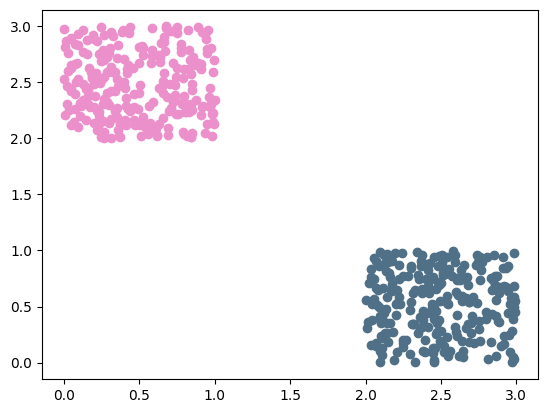

Wir haben 500 Datenpunkte zur Verfügung.


In [18]:
# Das sind die Daten, die uns zur Verfügung stehen.

from resources.code.help_functions import daten
import matplotlib.pyplot as plt
import random

daten, plt = daten()
plt.show()

print(f"Wir haben {len(daten)} Datenpunkte zur Verfügung.")

# Hier werden die Daten durchmischt.
daten = random.sample(daten, k=len(daten))

# Die Daten werden in Trainings- und Testdaten aufgeteilt (Verhältnis 8:2).
trainings_daten = daten[:400]
test_daten = daten[400:]
del daten

Wir implementieren folgendes neuronales Netz, das du bereits oben konstruiert hast.

&nbsp;


 <figure>
  <img src="resources/img/nn3.png" alt="neuronales Netz" style="width:60%">
  <figcaption></figcaption>
</figure> 

&nbsp;

In [84]:
class Net(nn.Module):
    def __init__(self, num_in, num_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(num_in, 2)
        self.fc2 = nn.Linear(2, 2)
        self.relu=torch.nn.ReLU()
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

tensor([[0.5557, 0.4443],
        [0.5642, 0.4358]], grad_fn=<SoftmaxBackward0>)


In [108]:
def train(model, train_data, train_labels, lr):
    model.train(True)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    loss_fn = torch.nn.MSELoss()
    # loss_fn = torch.nn.CrossEntropyLoss()
    optimizer.zero_grad()
    outputs = model(train_data)
    loss = loss_fn(outputs, train_labels)
    print('#####', loss)
    loss.backward()
    optimizer.step()
        
def test(model, test_data, test_labels):
    model.train(False)
    loss_fn = torch.nn.MSELoss()
    # loss_fn = torch.nn.CrossEntropyLoss()
    outputs = model(test_data)
    loss = loss_fn(outputs, test_labels)
    correctly_classified = 0
    for idx, x in enumerate(outputs):
        if torch.argmax(x) == test_labels[idx]:
            correctly_classified += 1
    print(f"Correctly classified: {correctly_classified} / {outputs.shape[0]}")
    return loss

In [100]:
X_train = torch.tensor([])
Y_train = torch.tensor([])
X_test = torch.tensor([])
Y_test = torch.tensor([])

for datenpunkt in trainings_daten:
    koordinaten = torch.tensor([[datenpunkt[0][0], datenpunkt[0][1]]])
    X_train = torch.cat( ( X_train, koordinaten), dim=0 )
    Y_train = torch.cat( ( Y_train, torch.tensor([[datenpunkt[1]]])), dim=0 )
    
for datenpunkt in test_daten:
    koordinaten = torch.tensor([[datenpunkt[0][0], datenpunkt[0][1]]])
    X_test = torch.cat( ( X_test, koordinaten), dim=0 )
    Y_test = torch.cat( ( Y_test, torch.tensor([[datenpunkt[1]]])), dim=0 )

In [109]:
from copy import deepcopy

def get_model(model):
      return deepcopy(model)
    
epochs = 500
net = Net(2,2)
lr = 0.1
loss_min = 100000000
counter = 0
best_model = get_model(net)

for i in range(epochs):
    # Training
    train(net, X_train, Y_train, lr)
    # Test
    loss = test(net, X_test, Y_test)
    print(f"Loss={loss}")
    
    # Falls der Loss nach drei Durchläufen nicht wesentlich kleiner wird 
    # als der bisher minimaler Loss, dann wird die Lernrate um den Faktor 
    # 10 verkleinert.
    
    if loss - loss_min > 0.1:
        print("Diff=", loss - loss_min)
        counter += 1
        if counter == 3:
            lr /= 10
            counter = 0
            model = best_model
            print("#### New learning rate", lr)
            
    # Wenn der aktuelle Loss minimal ist, dann wird dieser in der Variablen 
    # 'loss_min' gespeichert und das beste Modell in der Variablen 'best_model'.
    
    else:
        loss_min = loss
        counter = 0
        best_model = get_model(net)

##### tensor(0.2502, grad_fn=<MseLossBackward0>)
Correctly classified: 53 / 100
Loss=0.25020331144332886
##### tensor(0.2502, grad_fn=<MseLossBackward0>)
Correctly classified: 53 / 100
Loss=0.25019094347953796
##### tensor(0.2502, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2501794397830963
##### tensor(0.2502, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2501687705516815
##### tensor(0.2502, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2501588463783264
##### tensor(0.2502, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.250149667263031
##### tensor(0.2502, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25014108419418335
##### tensor(0.2501, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25013309717178345
##### tensor(0.2501, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2501257061958313
##### tensor(0.2501, grad_fn=<MseLossBackward0>)
Correctly classifie

##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25001564621925354
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500154376029968
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500152289867401
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500150203704834
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500148117542267
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25001460313796997
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25001442432403564
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500142455101013
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500140368938446
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified:

##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500052750110626
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000518560409546
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500051259994507
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500051259994507
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000500679016113
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000494718551636
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000491738319397
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500048577785492
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000476837158203
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classifie

Correctly classified: 0 / 100
Loss=0.250000923871994
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000086426734924
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000089406967163
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000086426734924
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000086426734924
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000086426734924
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000086426734924
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000086426734924
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000083446502686
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000083446502686
##### tenso

Correctly classified: 0 / 100
Loss=0.25000032782554626
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000035762786865
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000032782554626
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000032782554626
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500002980232239
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500002980232239
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000032782554626
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.2500002980232239
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000032782554626
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000035762786865
##### tensor

Correctly classified: 0 / 100
Loss=0.25000011920928955
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000008940696716
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000008940696716
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000008940696716
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000011920928955
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000011920928955
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000008940696716
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000008940696716
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000011920928955
##### tensor(0.2500, grad_fn=<MseLossBackward0>)
Correctly classified: 0 / 100
Loss=0.25000008940696716
##### ten

In [8]:
# Führe dieses Feld aus, indem du entweder oben auf 'Run' klickst oder 'Strg + Enter' drückst.
import torch 
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
import torch.utils.data as data
import torchvision 
import torchvision.transforms as transforms

from tqdm import tqdm



Importiere zunächst alle notwendigen Bibliotheken für dieses Jupyter Notebook, indem du das untere Codefeld ausführst. Beachte, dass du bei jedem Neustart des Kernels auch das untere Codefeld jedes Mal ausführen musst.

____

<i style="font-size:38px">?</i>

    
<i>Wir haben gelernt, wie wir das Perzeptron trainieren können Doch warum haben wir das eigentlich gemacht?</i>

&nbsp;

<details>
    
<summary>➤ Klicke hier, um deine Antwort zu prüfen.</summary>
   
Wir möchten das Perzeptron so trainieren, dass wir <b>unbekannte</b> Daten, auf denen wir unser Perzeptron <b>nicht</b> trainiert haben, richtig klassifizieren. Die Performance auf den <b>Trainingsdaten</b> dient zwar als Orientierung, ist aber nicht besonders wichtig.
   
</details>

<h2>Was sind tiefe neuronale Netze?</h2>

Bis jetzt hast du gelernt, dass ein neuronales Netz aus einer Eingabeschicht (engl. <i>input layer</i>), einer Ausgabeschicht (engl. <i>output layer</i>) und einer Schicht zwischen der Eingabe- und Ausgabeschicht besteht. Die dazwischenliegende Schicht bezeichnet man als <i>hidden layer</i>. Hat ein neuronales Netz eine ausreichend große Anzahl an <i>hidden layers</i>, so wird es als <b>tiefes neuronales Netz</b> (engl. <i><b>deep neural network</b></i>) bezeichnet. 

&nbsp;


 <figure>
  <img src="img/deep_neural_network.webp" alt="Deep Neural Network" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

In der Grafik siehst du, dass die Neuronen einer beliebigen Schicht mit allen Neuronen der nachfolgenden Schicht verbunden sind. Solche Schichten, die vollständig mit der nachfolgenden Schicht verbunden sind, bezeichnet man als <i><b>fully-connected layer</b></i>. Da dieses neuronale Netz nur aus solchen Schichten besteht, nennt man so ein Netz auch <i>Fully Connected Neural Network</i>.

Im Folgenden möchten wir so ein Netz mithilfe von <i>PyTorch</i> umsetzen, um es mithilfe von selbst generierten Daten trainieren zu lassen. 

____


<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Ergänze die folgende Klasse, indem du drei vollständig verbundene Schichten im Konstruktur der Klasse einfügst. Die Anzahl der Neuronen der Eingabe- und Ausgabeschichten werden dabei als Parameter angegeben. Die versteckte Schicht soll fünf Neuronen enthalten. Die Funktion 'forward' brauchst du vorerst nicht zu beachten.</i>

In [4]:
# Eine Beispielschicht mit 3 Eingängen und 4 Ausgaben.
schicht_beispiel = nn.Linear(3, 4)

class Net_Relu(torch.nn.Module):

    def __init__(self, num_in, num_out):
        super(Net_Relu, self).__init__()
        # Füge hier die Layer ein.

    def forward(self, x):
        # weiter unten
        return

Nun möchten wir einen Punkt als Eingabe in unser neuronales Netz einsetzen und eine Ausgabe bekommen. Dafür müssen wir in unserem Netz die Methode <i>forward</i> implementieren. In dieser Methode geben wir an, wie die Eingabe Layer für Layer verarbeitet wird.

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Implementiere oben in deinem neuronalen Netz die Methode 'forward'. Die Eingabe des ersten Layers entspricht dabei dem Parameter 'num_in', die Eingabe des zweiten Layers der Ausgabe des ersten Layers usw. Die Methode soll die Ausgabe der letzten Schicht in Prozent zurückgeben. (Du brauchst zunächst keine Aktivierungsfunktion zu verwenden.)</i>

<h3>Trainieren und testen</h3>

Jetzt sind wir bereit unser neuronales Netz zu trainieren. Wir haben bereits oben unsere Trainingsdaten erzeugt. Jetzt müssen wir diesen Daten noch labeln, d.h. der entsprechenden Klasse zuweisen. Dieser Prozess ist normalerweise sehr aufwendig, weil ein oder sogar mehrere Menschen sich die Daten durchsehen und der entsprechenden Kategorie zuweisen müssen (du hast das bestimmt auch schon einmal unfreiwillig bei einer Captcha gemacht). Für unseren Fall können wir aber für das Labeln die uns bekannte Funktion benutzen, die das neuronale Netz erlernen soll. 

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Erzeuge einen Tensor, dessen Einträge die entsprechenden Labels der Datenpunkte sind.</i>

Wir haben also nun Trainingsdaten erzeugt. Um ein zufriedenstellendes Training zu gewährleisten, brauchen wir allerdings noch Testdaten, die sich jeweils von den Trainingsdaten <b>unterscheiden</b>.

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Erzeuge 50 Testdatenpunkte und label sie entsprechend der Funktion wie bei den Trainingsdaten.</i>

____

<i class="fa-solid fa-eye" style="font-size:38px"></i>

<i>Versuche die Idee der Implementierung der Trainingsmethode zu verstehen. Erzeuge eine Instanz von deinem neuronalen Netz und übergebe der Trainingsmethode dein Modell. Lass dir dabei mit der 'print'-Funktion die Ausgaben des neuronalen Netzes und die Labels der Datenpunkte ausgeben, um besser nachzuvollziehen, wie das Training abläuft.</i>

In [7]:
def train(model, train_data, train_labels):
    model.train(True)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
    loss_fn = torch.nn.CrossEntropyLoss()
    for i in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(train_data)
        loss = loss_fn(outputs, train_labels)
        loss.backward()
        optimizer.step()

Um zu beurteilen, wie gut das neuronale Netz lernt, betrachten wir die <b>Loss-Funktion</b>. Die Loss-Funktion gibt uns an, wie weit die Ausgaben des neuronalen Netzes von den richtigen Labels abweichen. Je kleiner der entsprechende Wert der Loss-Funktion für ein bestimmte Eingabe, desto besser ist die Klassifikation.

&nbsp;

 <figure>
  <img src="resources/img/train_val_loss_landscape.png" alt="Loss-Function" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;

Ein weiteres Maß zur Bewertung der Güte eines neuronalen Netzes ist die <i><b>Accuracy</b></i>. Die Accuracy gibt in Prozent an, wie viele Daten richtig klassifiziert wurden. 
    
$\text{Accuracy} = \frac{\text{correctly classified}}{\text{total}} $

____

<i style="font-size:38px">?</i>

<i>Auf welchen Daten muss die Loss-Function und die Accuracy möglichst gut sein? Auf den Trainings- oder Testdaten? Ist die Accuracy immer ein gutes Maß, um die Güte eines neuronalen Netzes zu beurteilen?</i>

&nbsp;
<details>
<summary>➤ Klick hier, um deine Antwort zu prüfen.</summary>
Das Ziel ist es, ein neuronales Netz so zu trainieren, dass es ungesehenen Daten gut klassifizieren kann. Ein geringer Wert der Loss-Funktion und eine hohe Accuracy sind zwar Indizien dafür, dass das neuronale Netz etwas gelernt hat, aber nicht ausreichend dafür, dass es ungesehenen Daten gut klassifiziert. Es kann nämlich sein, dass das Netz die Trainingsdaten auswendig gelernt hat und die Perfomance auf unbekannten Daten sehr schlecht ist.
    
&nbsp;

 <figure>
  <img src="img/overfitting.png" alt="Overfitting" style="width:40%">
  <figcaption></figcaption>
</figure> 

&nbsp;
    
Es ist also wichtig, das Training rechtzeitig abzubrechen.
    
</details>

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Implementiere eine Testfunktion, die den Wert der Loss-Funktion und der Accuracy auf den Testdaten zurückgibt.</i>

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Implementiere nun den gesamten Trainingsprozess. Werte dabei nach jeder Epoche die Loss-Funktion und die Accuracy auf den Testdaten aus.</i>

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Ersetze nun deine Funktion durch eine nicht-lineare Funktion (z.B.$f(x) = \frac{1}{2} x^2 - 20$) und lass das Netzwerk noch einmal trainieren. Was beobachtest du?</i>

&nbsp;

<details>
<summary>➤ Klick hier, um fortzufahren.</summary>

Das Netzwerk sollte die Daten nicht mehr mit so einer guten Genauigkeit klassifizieren können, weil die Daten nicht mehr mit Hilfe einer Linie trennbar sind. Das liegt daran, dass keine Aktivierungsfunktion verwendet wird bzw. die Aktivierungsfunktion jeder Schicht des neuronalen Netzes linear ist. 
    
</details>

<h3>Was lernt eigentlich das neuronale Netzwerk beim Training?</h3>

In diesem Abschnitt gehen wir der Frage nach, was das neuronale Netzwerk beim Training eigentlich lernt.

Wie wir wissen sind unterschiedliche Daten (wie z.B. Bilder) n-dimensionale Punkte in einem n-dimensionalem Koordinatensystem. Wenn das Netzwerk nun mit diesen Punkten trainiert wird, lernt es im Laufe des Trainings, welche Punkte zu welcher Klasse gehören und kann im Optimalfall auch ähnliche unbekannte Daten richtig einordnen.

&nbsp;

 <figure>
  <img src="img/layer_sizes.jpeg" alt="2-dimensional space" style="width:25%">
  <figcaption></figcaption>
</figure> 

&nbsp;

<b>Was das Netzwerk also im Grunde genommen lernt, ist eine Trennlinie/-kurve zwischen den Datenpunkten zu ziehen</b>. 

Wenn die Aktivierungsfunktion linear ist, so ist es auch nur möglich linear trennbare Datenpunkte zu separieren. Wenn die Aktvierungsfunktion nicht linear ist, so ist es auch möglich wie in der Grafik Daten mithilfe einer Trennkurve voneinander zu trennen.

Die wahrscheinlich am häufigsten verwendete nicht lineare Funktion in neuronalen Netzen ist die ReLu-Funktion. 

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Füge in der 'forward'-Methode deines neuronalen Netzes nach jeder Ausgabe eines Layers eine ReLu-Funktion hinzu und lasse das Netzwerk erneut auf den Daten, die durch deine nicht-lineare Funktion erzeugt wurden trainieren. Was beobachtest du nun?</i>

____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Zusatzaufgabe: Generiere drei oder mehr Klassen von Datenpunkten mit Hilfe einer von dir gewählten Funktion. Trainiere anschließend ein neuronales Netz, das neue, frei gewählte Datenpunkte (der Funktion entsprechend) deinen gewählten Klassen richtig zuordnet.</i>

<span style="color:blue"><i>Übrigens</i></span>: Die Berechnung der Gradienten bei der Backpropagation erfordern sehr viel Rechenaufwand. Eine CPU wird nur bei kleinen Daten(mengen) gute Ergebnisse in überschaubarer Zeit liefern können. Aus diesem Grund verwendet man GPU-Einheiten (Grafikprozessoren), um ein neuronales Netz trainieren zu lassen. Der Vorteil dieser Verwendung besteht darin, dass die Berechnungen <i>parallel</i> ablaufen können und das Netz somit viel schneller trainiert.

<h2>Convolutionale Neural Networks (CNNs)</h2>

Angenommen du möchtest (relativ große) Bilder mit einem Netzwerk aus Fully-Connected-Layern klassifizieren. 


____

<i style="font-size:38px">?</i>

<i>Eine Schicht hat 64 Neuronen und ist mit einer Schicht aus 100 Neuronen verbunden. Wie viele Gewichte werden zwischen diesen beiden Schichten gelernt?</i>

&nbsp;
<details>
<summary>➤ Klick hier, um deine Antwort zu prüfen.</summary>
64 * 100 = 6400 Gewichte (ohne die Bias-Gewichte) werden gelernt.
    
</details>

Die Anzahl der erlernbaren Gewichten kann in einem Fully-Connected-Netzwerk sehr groß werden und das Lernen u.a. deshalb ineffektiv. Aus diesem Grund hat man sich für die Klassifikation von Bidern eine neue Architektur von neuronalen Netzen überlegt.

<b><i>Convolutional Neural Networks</i></b> (deutsch faltende neuronale Netze) bestehen aus unterschiedlichen Schichten. 


&nbsp;

 <figure>
  <img src="img/cnn.jpeg" alt="CNN" style="width:70%">
  <figcaption></figcaption>
</figure> 

&nbsp;

____

<i class="fa-solid fa-eye" style="font-size:38px"></i>

<i>Schau dir folgendens Video an, um die Idee von CNNs zu verstehen:</i> https://www.youtube.com/watch?v=YRhxdVk_sIs

Die <b>Convolutional Layer</b> bilden den Kern von CNNs. In der Grafik siehst du, was genau in so einem Layer passiert.

&nbsp;

 <figure>
  <img src="img/convlayer.png" alt="CNN" style="width:70%">
  <figcaption></figcaption>
</figure> 

&nbsp;

(Hier ist das Prinziep des Convolutional Layers mit einer Animation dargestellt: https://developers.google.com/machine-learning/glossary/#convolutional_neural_network)

Nach einem Convolutional Layer folgt zumeist ein <b>Max Pooling Layer</b>, der die Informationen reduziert. Die Gewichte von dieser Schicht werden <i>nicht</i> erlernt.

&nbsp;

 <figure>
  <img src="img/max_pooling.png" alt="Max Pooling" style="width:50%">
  <figcaption></figcaption>
</figure> 

&nbsp;





____

<i class="fa fa-laptop" style="font-size:38px"></i>

<i>Implementiere ein Convolutional Neural Network, um die Klassifikation von den gemalten Ostereiern zu umzusetzen. Du findest im Folgenden kleine Codesnippets, die dir helfen sollen diese Aufgabe zu lösen. Zögere nicht, dir von jemandem helfen zu lassen!</i>

In [24]:
# Hier könnte der Pfad zu deinen Daten / die Pfade zu den Ordnern mit den Trainings- und Testbildern stehen.
train_dataset_path = 'DataSet/train'
test_dataset_path = 'DataSet/test'

In [ ]:
# Hier könnte die Klasse deines CNNs implementiert sein.
# Folgende Methoden könnten dir dabei helfen.

# Convolutional Layer
intput_channels = 3
output_channels = 6
kernel_size = 5
nn.Conv2d(intput_channels, output_channels, kernel_size)

# Max Pooling Layer
kernel_size_max = 2
nn.MaxPool2d(kernel_size_max, 1)

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        # print(x.shape)
        # x = x.view(-1, 16 * 617 * 433)            # -> n, 400
        # x = x.view(-1, 16 * 4 * 4)
        x = x.view(-1, 16 * 13 * 13)
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return self.softmax(x)

In [27]:
# Hier werden deine Trainings- und Testdaten in einem Trainloader geladen.

train_transforms = transforms.Compose([
  transforms.Resize([64,64]),
  transforms.ToTensor()
])

train_dataset = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=train_transforms)
train_loader = data.DataLoader(train_dataset, batch_size=16, shuffle=True)

NameError: name 'transforms' is not defined

In [25]:
# Hier könntest du deine train- und test-Methoden implementieren.
# Orientiere dich am oberen Code.

# Verwende diesen Optimizer für ein neuronales Netz 'net'
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)


NameError: name 'net' is not defined

In [26]:
# Hier könntest du dein Training umsetzen.
# Nach jeder Epoche solltest du deinen Loss und die Accuracy ausgeben.
# Tipp: Speichere immer das Modell mit dem geringsten durchschnittlichen 
# Loss-Wert als optimales Modell ab. 



In [ ]:
# Mit dieser Methode kannst du dir Bilder deines Trainloaders anzeigen lassen.
# Beschrifte die Bilder zusätzlich mit einem passenden Label.

for x,y in train_loader:
    image = x[0]
    image = image.permute(1, 2, 0).numpy()
    plt.imshow(image)
    plt.show()

<h3>Aktuelle Forschung</h3>

Die Forschung zu neuronalen Netzen ist noch lange nicht ausgeschöpft. Es gibt noch sehr vieles zu entdecken. So wissen wir z.B. immer noch nicht richtig, was genau neuronale Netze eigentlich lernen. 

Wenn du dich für die aktuelle Forschung zu neuronalen Netzen oder KI interessiert, ist folgender YouTube-Kanal empfehlenswert: 

https://www.youtube.com/c/K%C3%A1rolyZsolnai/videos?view=0&sort=p&shelf_id=0

<h2>Bildquellen</h2>

https://pixabay.com/de/photos/ai-generiert-junge-junger-mann-7772478/

https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png

https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png

https://pyimagesearch.com/wp-content/uploads/2019/10/train_val_loss_landscape.png

https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg

https://anhreynolds.com/img/cnn.png

https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png
